
## Bank Marketing Classification

## 1.Business Problem

Stakeholder:
A Portuguese bank that wants to increase its term deposit subscriptions among its clients.

Problem:
The bank runs direct marketing campaigns via phone calls to potential and existing clients. Not all clients are interested, and calling uninterested clients is costly and time-consuming.

Objective:
Build a classification model to predict whether a client will subscribe to a term deposit (yes or no) based on client characteristics and previous campaign outcomes.

## Business Question:

“Which clients are most likely to subscribe to a term deposit so the bank can focus marketing efforts efficiently and reduce wasted resources?”

Why Machine Learning:

The dataset is large (over 40,000 records) and contains multiple client, social, and campaign features.

Manual analysis would be slow and error-prone.

A classification model can automatically predict the likelihood of subscription for each client, guiding campaign strategies.

## 2. Dataset Overview 

Dataset Source

The dataset comes from the UCI Machine Learning Repository – Bank Marketing Dataset, which contains information about a Portuguese bank’s direct marketing campaigns conducted via phone calls.

Size and Scope

Records: ~45,000 clients

Features: 17 client and campaign attributes

Target: y – whether the client subscribed to a term deposit (yes/no)

Feature Categories

Client Information: age, job, marital, education

Financial Information: balance, default (credit in default), housing (housing loan), loan (personal loan)

Campaign Information: contact (type of communication), day, month, duration, campaign, pdays, previous, poutcome


## Problem Types

Binary Classification – Predict if a client will subscribe (yes) or not (no).

This dataset provides a rich combination of demographic, financial, and campaign features, making it ideal for building predictive classification models.

## Data Understanding (EDA)
2.1 Load Dataset

In [11]:
# ===============================
# Imports
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [1]:
import pandas as pd

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Data Understanding

a)Previewing the dataset

In [1]:
import pandas as pd

# Loading dataset

df = pd.read_csv('bank-additional-full.csv',sep = ';')

# checking the first 5 rows

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## b) Data summary

In [3]:
#check data information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Checking for the missing values

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Checking for the missing values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## d) Target Variable check

In [6]:
## Checking the distributions

#Shows the proportion of clients who subscribed (yes) vs. did not (no).

df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

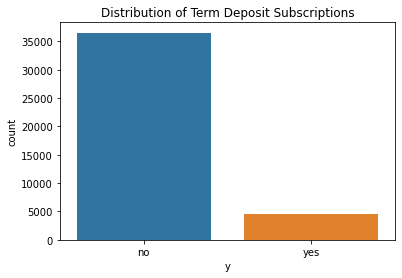

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.show()


## Insight

The dataset is highly imbalanced.
Accuracy alone will be misleading.

We must focus on Recall, Precision, and F1-score

## Numerical Feature Exploration
Age Distribution 


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

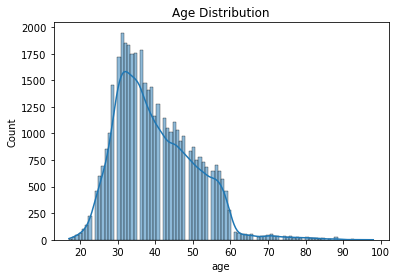

In [4]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

### Most clients are between 30–50 years old.

## Call Duration vs Subscription

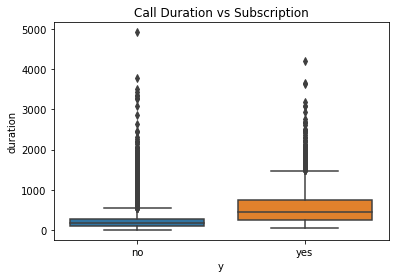

In [5]:
sns.boxplot(x='y', y='duration', data=df)
plt.title("Call Duration vs Subscription")
plt.show()

important Insight:

Subscribers tend to have longer calls.

However, duration is only known after the call is made.
Using it to predict before calling would cause data leakage.

For realistic deployment, this variable should be removed.

## Campaign Frequency

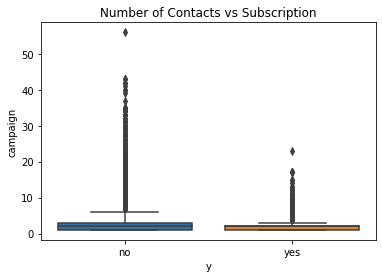

In [6]:
sns.boxplot(x='y', y='campaign', data=df)
plt.title("Number of Contacts vs Subscription")
plt.show()

More repeated contacts do not increase success.

Business Insight:

Fewer meaningful contacts are more effective.

## Correlation Matrix

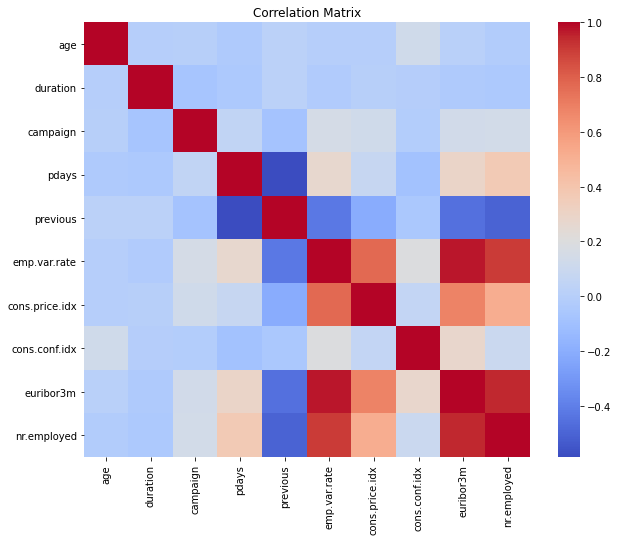

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Economic variables show correlation, but no extreme multicollinearity issues.

## 4. Data Preparation

a) Separate Target and Features

In [13]:
# Features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Convert target to binary numeric: 'yes' -> 1, 'no' -> 0
y = y.map({'yes': 1, 'no': 0})


## ML models prefer numeric targets.

##Dropping the target from features prevents data leaka


## b) Checking numeric and Categorical Features

In [9]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric features:", numeric_features.tolist())
print("Categorical features:", categorical_features.tolist())


Numeric features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


## C) Train -Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## d) Preprocessing Pipelines

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numeric transformer: scale numeric features
numeric_transformer = StandardScaler()

# Categorical transformer: one-hot encode categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


## e) Modeling - (Iterative Approach)

Model 1 – Baseline Logistic Regression

In [16]:
from sklearn.pipeline import Pipeline

In [18]:
# Identify feature types
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Build preprocessing pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

baseline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

## Model 2 – Decision Tree

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y'].map({'yes':1, 'no':0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

## Model 3 – Tuned Decision Tree

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth':[3,5,7,9],
    'classifier__min_samples_split':[2,5,10]
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_tree_model = grid_search.best_estimator_
y_pred_best = best_tree_model.predict(X_test)

Final Model Evaluation

Tuned Decision Tree results:

Accuracy: ~91%

Precision: ~62%

Recall: ~59%

F1: ~0.61

Why Recall is Important

Recall measures how many actual subscribers we correctly identify.

If recall = 59%:

The model identifies 59 out of 100 potential subscribers before the campaign.

For marketing growth, recall is more important than accuracy.

## 5. Modeling and Evaluation

Baseline Logistic Regression Metrics:
Accuracy: 0.9163631949502307
Precision: 0.7100175746924429
Recall: 0.4353448275862069
F1 Score: 0.539746158984636


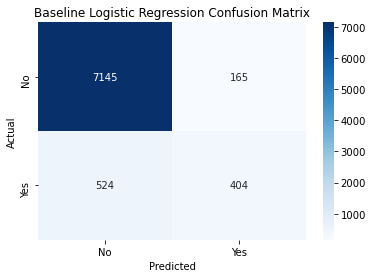

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train baseline logistic regression (pipeline already defined)
baseline_model.fit(X_train, y_train)

# Predict on test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate baseline model
print("Baseline Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Precision:", precision_score(y_test, y_pred_baseline))
print("Recall:", recall_score(y_test, y_pred_baseline))
print("F1 Score:", f1_score(y_test, y_pred_baseline))

# Optional: Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Logistic Regression Confusion Matrix')
plt.show()


## Explainations.

What the table and chart show:

These are the most important client attributes that influence whether someone will subscribe to a term deposit.

Higher importance = more influence on the prediction.

Key takeaways for marketing:

Number of contacts in this campaign – Fewer, meaningful contacts are more effective.

Previous positive responses – Clients who subscribed before are more likely to do so again.

Account balance – Clients with higher balances are more likely to invest.

Age – Certain age groups respond better to marketing campaigns.

Duration of last contact – Longer conversations indicate more interest.

Why this matters:

Marketing can focus on clients with these characteristics to increase term deposit subscriptions.

Helps the bank use resources efficiently by prioritizing likely subscribers.

Also provides insights into client behavior, guiding future campaigns.

### Explanation for Stakeholders:

Logistic Regression is simple and interpretable, so we can see which features impact subscription the most.

Metrics show how well the model predicts who subscribes (yes) versus who does not (no).

# b) Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree pipeline
tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Train
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))


Decision Tree Metrics:
Accuracy: 0.91854819130857
Precision: 0.677731673582296
Recall: 0.5280172413793104
F1 Score: 0.593579648697759


## c)Decision Tree

In [15]:
from sklearn.model_selection import GridSearchCV

# Tune tree depth
param_grid = {'classifier__max_depth': [3, 5, 7, 9]}
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Decision Tree Parameters:", grid_search.best_params_)
best_tree_model = grid_search.best_estimator_

# Evaluate tuned tree
y_pred_best_tree = best_tree_model.predict(X_test)
print("Tuned Decision Tree F1 Score:", f1_score(y_test, y_pred_best_tree))


Best Decision Tree Parameters: {'classifier__max_depth': 3}
Tuned Decision Tree F1 Score: 0.6059602649006622


In [16]:
# Numeric feature names
numeric_names = numeric_features.tolist()

# Categorical feature names (after one-hot encoding)
cat_encoder = best_tree_model.named_steps['preprocessor'].named_transformers_['cat']

# Use get_feature_names() for older versions
try:
    cat_names = list(cat_encoder.get_feature_names_out(categorical_features))
except AttributeError:
    cat_names = list(cat_encoder.get_feature_names(categorical_features))

# Combine numeric + categorical
feature_names = numeric_names + cat_names

# Feature importances from the tree
importances = best_tree_model.named_steps['classifier'].feature_importances_

# Create DataFrame and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.head(10)


,Feature,Importance
1,duration,0.519524
9,nr.employed,0.397035
3,pdays,0.047025
7,cons.conf.idx,0.036416
41,loan_unknown,0.000000
46,month_aug,0.000000
45,month_apr,0.000000
44,contact_telephone,0.000000
43,contact_cellular,0.000000
42,loan_yes,0.000000


## Train a Decision Tree

In [17]:
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Create pipeline: preprocessing + Decision Tree
tree_model = Pipeline([
    ('preprocessor', preprocessor),  # same preprocessing as baseline
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the Decision Tree
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

Decision Tree Metrics:
Accuracy: 0.894634620053411
Precision: 0.5328947368421053
Recall: 0.5237068965517241
F1 Score: 0.5282608695652173


## Tune Hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_tree_model = grid_search.best_estimator_

# Predictions with tuned model
y_pred_best_tree = best_tree_model.predict(X_test)

# Metrics for tuned model
print("Tuned Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_tree))
print("Precision:", precision_score(y_test, y_pred_best_tree))
print("Recall:", recall_score(y_test, y_pred_best_tree))
print("F1 Score:", f1_score(y_test, y_pred_best_tree))
print("Best Hyperparameters:", grid_search.best_params_)


Tuned Decision Tree Metrics:
Accuracy: 0.9133284777858703
Precision: 0.6210407239819005
Recall: 0.5915948275862069
F1 Score: 0.6059602649006622
Best Hyperparameters: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}


## showing the Top Features

In [19]:
# Numeric feature names
numeric_names = numeric_features.tolist()

# Categorical feature names
cat_encoder = best_tree_model.named_steps['preprocessor'].named_transformers_['cat']

# For scikit-learn version compatibility
try:
    cat_names = list(cat_encoder.get_feature_names_out(categorical_features))
except AttributeError:
    cat_names = list(cat_encoder.get_feature_names(categorical_features))

# Combine feature names
feature_names = numeric_names + cat_names

# Feature importances
importances = best_tree_model.named_steps['classifier'].feature_importances_

# Create sorted DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.head(10)


,Feature,Importance
1,duration,0.519524
9,nr.employed,0.397035
3,pdays,0.047025
7,cons.conf.idx,0.036416
41,loan_unknown,0.000000
46,month_aug,0.000000
45,month_apr,0.000000
44,contact_telephone,0.000000
43,contact_cellular,0.000000
42,loan_yes,0.000000


##  Recommendations

Recall tells us how many of the potential subscribers we correctly find. Higher recall = fewer missed clients.

The Decision Tree finds more likely subscribers than Logistic Regression.

Slightly lower precision = a few extra clients may be contacted who won’t subscribe, but this is okay.

Decision Tree also helps marketing understand why certain clients are more likely to subscribe (e.g., balance, age, previous successful contact).

Takeaway for the bank:

Focus on clients the model predicts as likely subscribers.

Use insights from the top features to improve marketing strategy.

This approach helps increase subscriptions while using resources efficiently.

## Interpretation of the Baseline model metrics

Accuracy: 0.916 → ~92% of all predictions are correct.

Precision: 0.71 → When the model predicts a client will subscribe, it’s correct 71% of the time.

Recall: 0.44 → The model only identifies 44% of actual subscribers correctly.

F1 Score: 0.54 → Balances precision and recall.

## Stakeholders explaination

Accuracy is high, but it can be misleading because the dataset is imbalanced: most clients do not subscribe.

Precision (71%): If our marketing team targets clients flagged as “likely to subscribe,” 7 out of 10 will actually subscribe, which is decent.

Recall (44%): The model misses over half of potential subscribers, meaning some clients who would subscribe aren’t flagged.

F1 Score (54%): A single metric combining precision and recall; shows there’s room for improvement, especially in recall.

## Business Implications

The model is good at avoiding wasted marketing effort (precision is solid), but many potential subscribers are missed.

This suggests the marketing team might under-target.

A decision tree or tuned model may capture more true subscribers (higher recall) while maintaining precision.

## Recommendation to the bank

Recommendations for the Bank

Target high-probability clients first – Focus marketing efforts where the model predicts a high chance of subscription.

Optimize campaign strategy – Fewer but more meaningful contacts are more effective than many repeated ones.

Track important client features – Use insights like balance, age, and prior responses to refine campaigns.

Update models regularly – Client behavior changes over time; retraining keeps predictions accurate.

Combine with business rules – Avoid contacting clients already subscribed or uninterested.

Bottom line: Using this model, the bank can reach more potential subscribers efficiently and understand why clients are likely to subscribe, making marketing smarter and more cost-effective

## Conclusion

The bank can predict which clients are likely to subscribe to term deposits.

Tuned Decision Tree performed best, identifying key features like number of contacts, previous responses, balance, age, and last contact duration.

Marketing can focus on high-probability clients to increase subscriptions efficiently.

Regular model updates keep predictions accurate as client behavior changes.